In [1]:
# Data Preprocessing
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution1D,Conv1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense,GlobalAveragePooling1D
from numpy import array
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import Flatten
#from tensorflow.keras.layers.convolutional import Conv1D
from tensorflow.keras import optimizers
from sklearn.metrics import confusion_matrix
#from tensorflow.keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model
import itertools
import seaborn as sn
import pandas as pd



In [2]:
dataset1=pd.read_csv("Sub1_All_Vowel_gamma_IA_IP_IF_Labelled.csv")
print(dataset1.shape)

(190800, 506)


In [3]:
dataset1_test=pd.read_csv("Sub1_All_Vowel_gamma_IA_IP_IF_Labelled_test.csv")
print(dataset1_test.shape)

(47700, 504)


In [4]:
dataset1=pd.DataFrame(dataset1)

In [5]:
dataset1_test=pd.DataFrame(dataset1_test)

In [6]:
dataset1 = dataset1.drop(columns=['Class_1', 'Class_2'])

In [7]:
dataset1_test = dataset1_test.drop(columns=['Class_1', 'Class_2'])

In [8]:
features = dataset1.drop(columns=['Class']) 

In [9]:
features_test = dataset1_test.drop(columns=['Class']) 

In [10]:
dataset1_filled = features.fillna(features.mean())

In [11]:
dataset1_filled_test = features_test.fillna(features_test.mean())

In [ ]:

common_features = dataset1_filled.columns.intersection(dataset1_filled_test.columns)
print(f"Number of common features: {len(common_features)}")


missing_in_test = dataset1_filled.columns.difference(dataset1_filled_test.columns)
print(f"Features in train but missing in test: {missing_in_test}")


missing_in_train = dataset1_filled_test.columns.difference(dataset1_filled.columns)
print(f"Features in test but missing in train: {missing_in_train}")

Number of common features: 501
Features in train but missing in test: Index(['5_26_1', '5_26_2'], dtype='object')
Features in test but missing in train: Index([], dtype='object')


In [ ]:

dataset1_filtered = dataset1_filled.drop(columns=['5_26_1', '5_26_2'])


print(f"New dataset1 shape: {dataset1_filtered.shape}, New dataset1_test shape: {dataset1_filled_test.shape}")


assert dataset1_filtered.shape[1] == dataset1_filled_test.shape[1], "Feature mismatch after filtering!"


New dataset1 shape: (190800, 501), New dataset1_test shape: (47700, 501)


In [ ]:

columns_to_drop = ['5_26_1', '5_26_2', ]
existing_columns = [col for col in columns_to_drop if col in dataset1.columns]

dataset1_filtered_1 = dataset1.drop(columns=existing_columns)


In [15]:
dataset1_cleaned = pd.concat([dataset1_filtered, dataset1_filtered_1['Class']], axis=1)


In [16]:
dataset1_cleaned .shape

(190800, 502)

In [17]:
dataset1_cleaned_test = pd.concat([dataset1_filled_test, dataset1_test['Class']], axis=1)

In [18]:
X1=dataset1_cleaned.iloc[:,0:501].values
print(X1)
y1=dataset1_filtered_1.iloc[:,501].values
print(y1)

[[ 0.00000000e+00  1.78498919e-02  9.76017032e-03 ...  1.47257787e+01
  -4.07130723e+00  1.64814023e-03]
 [ 1.00000000e+00  3.07247535e-02  9.33369788e-03 ...  1.47257787e+01
  -4.07130723e+00  1.64814023e-03]
 [ 2.00000000e+00  2.35341340e-02  8.24676184e-03 ...  1.69805983e+01
  -1.12866249e+00  1.64814023e-03]
 ...
 [ 3.81570000e+04  9.32893806e-02  1.09565047e-02 ...  6.18224646e+00
   2.58900577e+00  1.64814023e-03]
 [ 3.81580000e+04  6.47972595e-02  9.86955408e-03 ...  6.18224646e+00
   2.58900577e+00  1.64814023e-03]
 [ 3.81590000e+04  3.35587113e-02  7.85821381e-03 ...  6.18224646e+00
   2.58900577e+00  1.64814023e-03]]
['Hello' 'Hello' 'Hello' ... 'Yes' 'Yes' 'Yes']


In [19]:
X1.shape

(190800, 501)

In [20]:
y1.shape

(190800,)

In [21]:
X1_test=dataset1_cleaned_test.iloc[:,0:501].values
print(X1)
y1_test=dataset1_test.iloc[:,501].values
print(y1_test)

[[ 0.00000000e+00  1.78498919e-02  9.76017032e-03 ...  1.47257787e+01
  -4.07130723e+00  1.64814023e-03]
 [ 1.00000000e+00  3.07247535e-02  9.33369788e-03 ...  1.47257787e+01
  -4.07130723e+00  1.64814023e-03]
 [ 2.00000000e+00  2.35341340e-02  8.24676184e-03 ...  1.69805983e+01
  -1.12866249e+00  1.64814023e-03]
 ...
 [ 3.81570000e+04  9.32893806e-02  1.09565047e-02 ...  6.18224646e+00
   2.58900577e+00  1.64814023e-03]
 [ 3.81580000e+04  6.47972595e-02  9.86955408e-03 ...  6.18224646e+00
   2.58900577e+00  1.64814023e-03]
 [ 3.81590000e+04  3.35587113e-02  7.85821381e-03 ...  6.18224646e+00
   2.58900577e+00  1.64814023e-03]]
['Hello' 'Hello' 'Hello' ... 'Yes' 'Yes' 'Yes']


In [ ]:
from numpy import array
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


labelencoder_y1 = LabelEncoder()
y1_encoded = labelencoder_y1.fit_transform(y1)
y1_encoded = y1_encoded.reshape(len(y1_encoded), 1)


onehot_encoder_y1 = OneHotEncoder(sparse_output=False)
onehot_encoded_y1 = onehot_encoder_y1.fit_transform(y1_encoded)


y1_test_encoded = labelencoder_y1.transform(y1_test)
y1_test_encoded = y1_test_encoded.reshape(len(y1_test_encoded), 1)

onehot_encoded_y1_test = onehot_encoder_y1.transform(y1_test_encoded)


In [25]:
onehot_encoded_y1.shape

(190800, 5)

In [26]:
onehot_encoded_y1_test.shape

(47700, 5)

In [27]:
from sklearn.model_selection import train_test_split


X_train,X_val,y_train, y_val = train_test_split(X1,onehot_encoded_y1, test_size=0.2, random_state=42,stratify=onehot_encoded_y1)  # 80% train, 20% remaining

In [28]:
y_val.shape

(38160, 5)

In [29]:
X1_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X1_test.reshape(X1_test.shape[0],X1_test.shape[1], 1)
X1_val = X_val.reshape(X_val.shape[0],X_val.shape[1], 1)
ins1=(X1_train.shape[0],X1_train.shape[1])
print(ins1)
input_shape1=(X1_train.shape[1], 1)
print(input_shape1)

(152640, 501)
(501, 1)


In [30]:
print(X1_train.shape)
print(X_test.shape)

(152640, 501, 1)
(47700, 501, 1)


In [31]:
X1_val.shape

(38160, 501, 1)

In [33]:
X1_train.shape

(152640, 501, 1)

In [34]:
X1_train.shape

(152640, 501, 1)

In [35]:
onehot_encoded_y1.shape

(190800, 5)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping





model = Sequential()
model.add(Conv1D(32, kernel_size=3, padding='same', activation='relu', input_shape=(X1_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(256, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

   
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

    

history = model.fit(X1_train, y_train, epochs=20, batch_size=128, validation_data=(X1_val, y_val))

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 179s 146ms/step - acc: 0.3793 - loss: 5.3000 - val_acc: 0.6266 - val_loss: 0.6597
Epoch 2/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 176s 148ms/step - acc: 0.6180 - loss: 0.6748 - val_acc: 0.6228 - val_loss: 0.6591
Epoch 3/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 178s 149ms/step - acc: 0.6230 - loss: 0.7312 - val_acc: 0.6198 - val_loss: 0.6581
Epoch 4/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 173s 145ms/step - acc: 0.6182 - loss: 0.6637 - val_acc: 0.6298 - val_loss: 0.6528
Epoch 5/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 175s 147ms/step - acc: 0.6064 - loss: 0.7154 - val_acc: 0.6192 - val_loss: 0.6565
Epoch 6/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 176s 147ms/step - acc: 0.6250 - loss: 0.6550 - val_acc: 0.6338 - val_loss: 0.6519
Epoch 7/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 181s 152ms/step - acc: 0.6238 - loss: 0.6796 - val_acc: 0.6252 - val_loss: 0.6569
Epoch 8/20
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 187s 157ms/step - acc: 0.6380 - loss: 0.6534 - val_acc: 0.6093 - val_loss: 0.6687
Epoch 9/

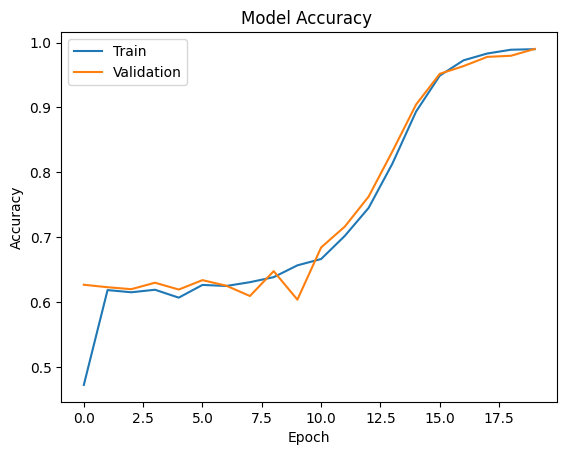

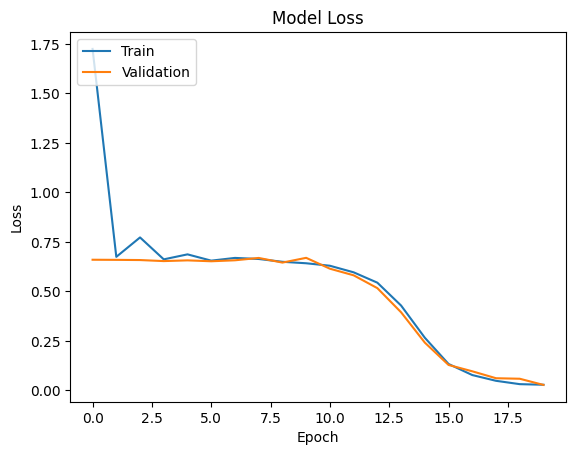

In [37]:
import matplotlib.pyplot as plt                          
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model Loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Validation'], loc='upper left') 
plt.show()

#'2_Subject':sub,

Prediction on test set result 
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step
Testing Accuracy: 0.6134381551362683
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.34      0.34      9512
           1       1.00      0.98      0.99      9690
           2       0.40      0.35      0.37     11061
           3       0.33      0.40      0.36      7897
           4       1.00      1.00      1.00      9540

    accuracy                           0.61     47700
   macro avg       0.61      0.61      0.61     47700
weighted avg       0.62      0.61      0.61     47700

Subject1_Confusion Matrix
[[3219    0 3259 3034    0]
 [  43 9539   59   49    0]
 [3900    1 3833 3327    0]
 [2378    0 2389 3130    0]
 [   0    0    0    0 9540]]


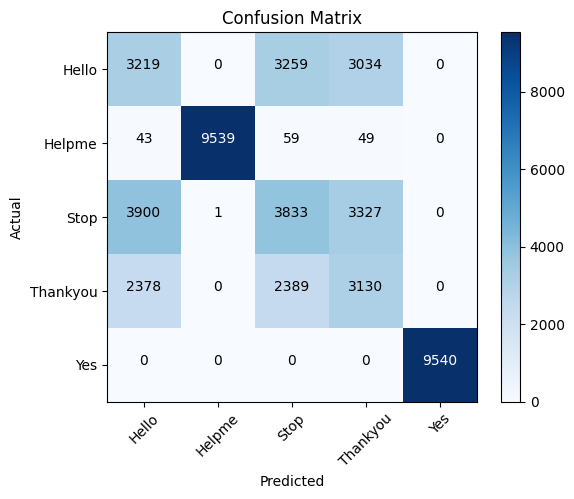

    A_Class  Sensitivity/Recall  Specificity  Precision  Accuracy  F1_Score  \
0     Hello               33.84        83.45      33.74     73.56      34.0   
1    Helpme               98.44       100.00      99.99     99.68      99.0   
2      Stop               34.65        84.42      40.18     72.88      37.0   
3  Thankyou               39.64        83.90      32.81     76.57      36.0   
4       Yes              100.00       100.00     100.00    100.00     100.0   

     FPR  
0  16.55  
1   0.00  
2  15.58  
3  16.10  
4   0.00  


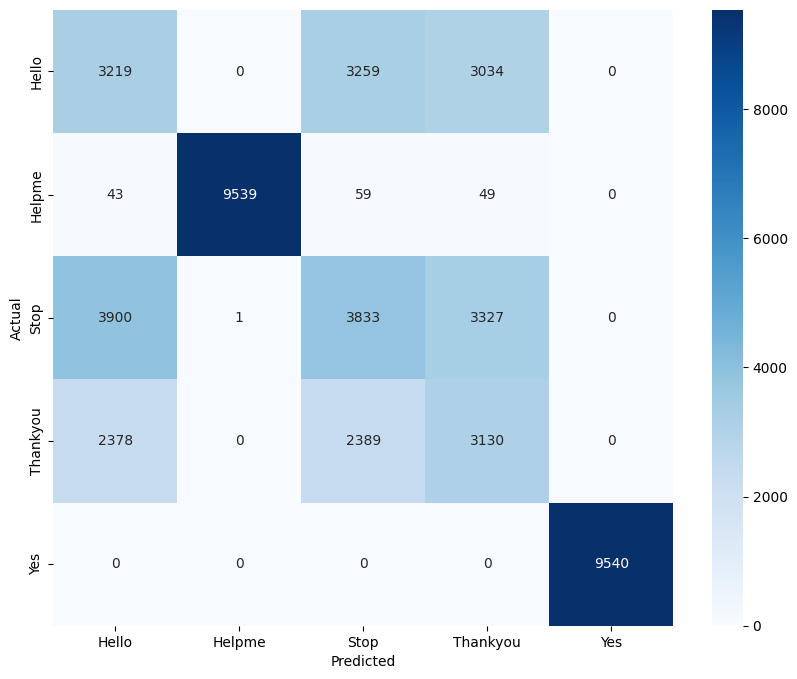

In [38]:


print("Prediction on test set result ")
#print (X1_test)
y1_pred=model.predict(X_test)
#print(y1_pred)
#print(y1)
a1 = []
b1 = []
for i in range(0,len(onehot_encoded_y1_test)):
    a1.append(np.argmax(y1_pred[i]))
    b1.append(np.argmax(onehot_encoded_y1_test[i]))

#print(a1)
#print(b1)

#Testing Accuracy
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(a1,b1)
print("Testing Accuracy:",accuracy1)

#Classification Report
from sklearn.metrics import classification_report 
report1=classification_report(a1,b1)
print("Classification Report:")
print(report1) 


#Making the Confusion Matrix for Subject1
print("Subject1_Confusion Matrix")
cm1=confusion_matrix(a1,b1)
print(cm1)
plt.imshow(cm1,cmap=plt.cm.Blues,interpolation='nearest')
classNames = ['Hello','Helpme','Stop','Thankyou','Yes']
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(classNames)) # length of classes
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# plotting text value inside cells
thresh = cm1.max() / 2.
for i,j in itertools.product(range(cm1.shape[0]),range(cm1.shape[1])):
    plt.text(j,i,format(cm1[i,j],'d'),horizontalalignment='center',color='white' if cm1[i,j] >thresh else 'black')
plt.show()

df_cfm = pd.DataFrame(cm1, index = classNames, columns = classNames)
df_cfm.index.name = 'Actual'
df_cfm.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
cfm_plot = sn.heatmap(df_cfm, annot=True,fmt="d",cmap='Blues')
cfm_plot.figure.savefig("Sub1_delta.jpg")

#Evaluate Results on the basis of Precision,Sensitivity,Specificity/True Negative Rate of all Subjects

sub='Sub1'
np.array(cm1)

FP = cm1.sum(axis=0) - np.diag(cm1) 
FN = cm1.sum(axis=1) - np.diag(cm1)
TP = np.diag(cm1)
TN = cm1.sum()-(FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR =np.round((TP/(TP+FN))*100,2)

# Specificity or true negative rate
TNR =np.round((TN/(TN+FP))*100,2) 

# False Positive Rate
FPR=np.round((FP/(FP+TN))*100,2)

# Precision or positive predictive value
PPV =np.round((TP/(TP+FP))*100,2)

#F1 Score
F1_Score=np.round((2*(TPR*PPV))/ (TPR+PPV))

# Overall accuracy
ACC =np.round(((TP+TN)/(TP+FP+FN+TN))*100,2)
     
data1 = {'A_Class':classNames,'Sensitivity/Recall': TPR, 'Specificity':TNR, 'Precision':PPV,'Accuracy':ACC,'F1_Score':F1_Score,'FPR':FPR}  
df1 = pd.DataFrame(data1)
print(df1)      

# export_excel = df1.to_excel ('Sub1_AlphaCNN_result.xlsx', index = None, header=True)





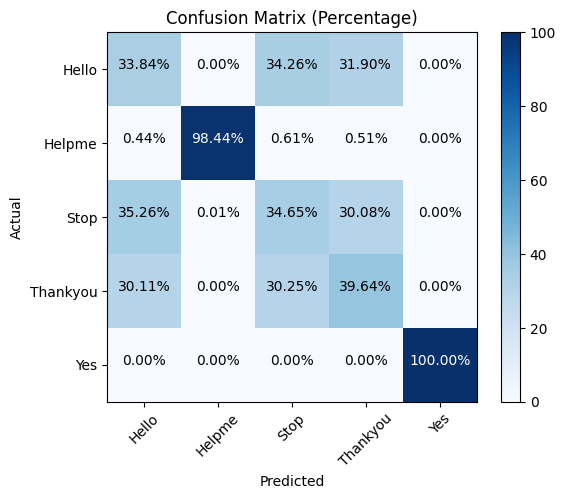

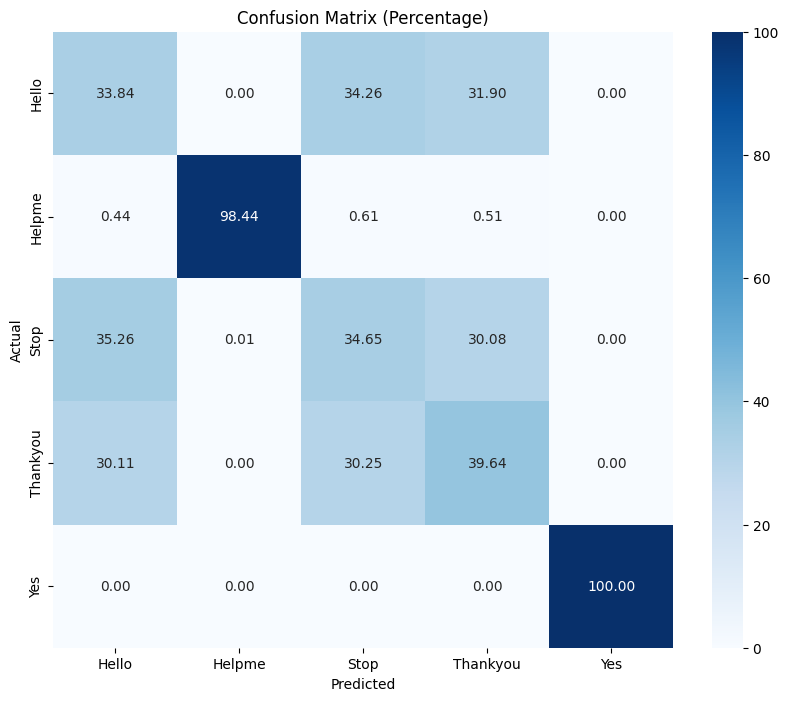

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm1 = confusion_matrix(a1, b1)

# Convert confusion matrix to percentage
cm1_percentage = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix with percentages
plt.imshow(cm1_percentage, cmap=plt.cm.Blues, interpolation='nearest')
classNames = ['Hello', 'Helpme', 'Stop', 'Thankyou', 'Yes']
plt.colorbar()
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = np.arange(len(classNames))  # length of classes
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

# Plotting text value inside cells (with percentages)
thresh = cm1_percentage.max() / 2.
for i, j in itertools.product(range(cm1_percentage.shape[0]), range(cm1_percentage.shape[1])):
    plt.text(j, i, f"{cm1_percentage[i, j]:.2f}%", horizontalalignment='center',
             color='white' if cm1_percentage[i, j] > thresh else 'black')

plt.show()

# Create a dataframe for percentage confusion matrix
df_cfm_percentage = pd.DataFrame(cm1_percentage, index=classNames, columns=classNames)
df_cfm_percentage.index.name = 'Actual'
df_cfm_percentage.columns.name = 'Predicted'

# Save the heatmap
plt.figure(figsize=(10, 8))
cfm_plot_percentage = sn.heatmap(df_cfm_percentage, annot=True, fmt=".2f", cmap='Blues')
cfm_plot_percentage.set_title("Confusion Matrix (Percentage)")
cfm_plot_percentage.figure.savefig("Sub1_Percentage_Confusion_Matrix.jpg")
